1 ) 특이값 분해 후 계수 2까지만 고려하여 낮은 계수 근사하는 코드 작성

In [2]:
import numpy as np
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

In [4]:
print("특잇값 분해 \n")
A = np.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]
])
pp.pprint(A)

특잇값 분해 

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])


In [5]:
U, s, VT = np.linalg.svd(A)
pp.pprint(U)

array([[-0.19101157, -0.89266338,  0.40824829],
       [-0.51371859, -0.26348917, -0.81649658],
       [-0.8364256 ,  0.36568503,  0.40824829]])


In [6]:
m, n = A.shape
Sigma = np.zeros((m, n)) #mxn 행렬 시그마
k = np.size(s)
Sigma[:k, :k] = np.diag(s) #특이값

pp.pprint(Sigma)

array([[9.69657342e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.25578339e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.48879510e-15, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])


In [8]:
pp.pprint(VT)

array([[-0.24139304, -0.25728686, -0.27318068, -0.2890745 , -0.30496832,
        -0.32086214, -0.33675595, -0.35264977, -0.36854359, -0.38443741],
       [ 0.53589546,  0.42695236,  0.31800926,  0.20906617,  0.10012307,
        -0.00882003, -0.11776313, -0.22670623, -0.33564933, -0.44459242],
       [ 0.09975293, -0.01037753,  0.23987452,  0.05273845,  0.0996209 ,
        -0.46517509, -0.52300449, -0.23591804,  0.593137  ,  0.14935136],
       [-0.259848  , -0.19489762, -0.10988774,  0.9273013 , -0.07153728,
        -0.05251768, -0.04829915, -0.05415057, -0.07582496, -0.0603383 ],
       [-0.26312174, -0.0585767 , -0.12150761, -0.05740164,  0.9302533 ,
        -0.0441965 , -0.05005435, -0.07728074, -0.13808364, -0.12003039],
       [-0.34412869, -0.09157816,  0.43274424, -0.05958094, -0.05492318,
         0.70339002, -0.33412339, -0.23272698,  0.08693936, -0.10601229],
       [-0.3607094 ,  0.01575684,  0.51799467, -0.04727562, -0.05090152,
        -0.33292338,  0.61579275, -0.27850803

In [9]:
#2개의 특잇값 선택
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]

In [10]:
#낮은 계수 근사하여 재구성한 데이터
B = np.matmul(U, np.matmul(Sigma, VT))
pp.pprint(B)

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [11., 12., 13., 14., 15., 16., 17., 18., 19., 20.],
       [21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]])


근사한다는게 뭐지? ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

아 근데 원래 변화가 없어야 하는건가? 코드는 잘 따라쳤는데
  
이래서 따라치기만 하면 문제다

2) 영상을 읽고 특잇값 분해 후 계수가 1,5,20,30, 50, 100 이 되도록 낮은계수 근사하여 출력하는 코드 작성

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

In [18]:
src = im.imread('flower3.jpg')
print(src.shape) 
A = src[:, :, 0] #채널을 떼버렸네? 왜 뗐을까? 그리고 0을 넣음 채널 떨구는건가??
print(A.shape)

(400, 600, 3)
(400, 600)


In [19]:
def reconstruct(U, Sigma, VT, n_elements):
    Sigma = Sigma[:, :n_elements]
    VT = VT[:n_elements, :] #벡터의 트랜스포즈니까 T 해도 똑같지 않을까?
    B = np.matmul(U, np.matmul(Sigma, VT))
    return B

In [22]:
plt.rcParams.update({'xtick.major.width':0,
                    'xtick.labelsize': 0,
                    'ytick.major.width':0,
                    'ytick.labelsize':0,
                    'axes.linewidth':0})

이걸 state방식으로 봐야하나? axes가 있으니까 oop방식으로 봐야하나?  
  
state 는 절차지향마냥 도화지에 그림을 덧대는 방식으로 update되는걸로 기억한다  

In [23]:
U, s, VT = np.linalg.svd(A) #특잇값 분해
m, n = A.shape
Sigma = np.zeros((m, n)) #mxn 행렬 sigma
k = np.size(s)
Sigma[:k, :k] = np.diag(s) #특잇값

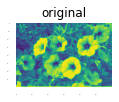

In [24]:
plt.subplot(3, 3, 1)
plt.title('original')
plt.imshow(A)

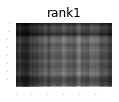

In [25]:
plt.subplot(3, 3, 2)
plt.title('rank1')
B = reconstruct(U, Sigma, VT, 1)
plt.imshow(B, cmap = 'gray')

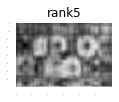

In [26]:
plt.subplot(3, 3, 3)
plt.title('rank5')
B = reconstruct(U, Sigma, VT, 5)
plt.imshow(B, cmap = 'gray')

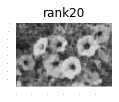

In [27]:
plt.subplot(3, 3, 4)
plt.title('rank20')
B = reconstruct(U, Sigma, VT, 20)
plt.imshow(B, cmap = 'gray')

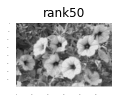

In [29]:
plt.subplot(3, 3, 5)
plt.title('rank50')
B = reconstruct(U, Sigma, VT, 50)
plt.imshow(B, cmap = 'gray')

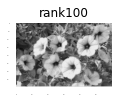

In [30]:
plt.subplot(3, 3, 6)
plt.title('rank100')
B = reconstruct(U, Sigma, VT, 100)
plt.imshow(B, cmap = 'gray')

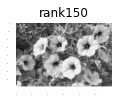

In [31]:
plt.subplot(3, 3, 7)
plt.title('rank150')
B = reconstruct(U, Sigma, VT, 150)
plt.imshow(B, cmap = 'gray')

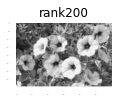

In [32]:
plt.subplot(3, 3, 8)
plt.title('rank200')
B = reconstruct(U, Sigma, VT, 200)
plt.imshow(B, cmap = 'gray')

image pyramid랑은 좀 다른개념인건가?

아마 SVD를 거치면서 image의 사이즈도 줄어들었을 것이다.

확인해보긴 좀 귀찮다 ㅋ 

3) 영상을 호모그래피 변환을 하여 출력하라.

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#cornaer1 의 좌표를 corners2의 좌표로 변환하는 호모그래피 행렬 xform 구하기
def compute_xform(corners1, corners2):
    A = []
    for i in range(4):
        x1, y1 = corners1[i]
        x2, y2 = corners2[i]
        A.append([x1, y1, 1, 0, 0, 0, -x2 * x1 , -x2 * y1, -x2])
        A.append([0, 0, 0, x1, y1, 1, -y2 * x1 , -y2 * y1, -y2])
    A = np.asarray(A)
    U, S, V = np.linalg.svd(A)
    xform = V[-1, :]
    xform = np.reshape(xform, (3, 3))
    return xform

In [38]:
def transform_image(xform, image1, corners1, corners2):
    #호모그래피 행렬 xform 을 통한 영상 image1의 변환
    warped = cv2.warpPerspective(image1, xform, (500, 500))
    
    h1, w1 = image1.shape[:2] # 원본 영상의 높이와 폭
    h2, w2 = warped.shape[:2] # 변환된 영상의 높이와 폭
    
    out_image = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    out_image[:h1, :w1, :3] = image1
    out_image[:h2, w1: w1 + w2, :3] = warped
        
    for i in range(4): #대응 위치 표시
        c1 = corners1[i]
        c2 = (corners2[i][0] + w1, corners2[i][1])
        cv2.circle(out_image, c1, radius = 2, color = (0, 255, 0), thickness = 2)
        cv2.circle(out_image, c2, radius = 2, color = (30, 255, 255), thickness = 2)
        cv2.line(out_image, c1, c2, color = (0, 0, 255), thickness = 1)
    
    cv2.imshow('original and transformed images', out_image)
    cv2.waitKey(0)

In [40]:
img_path = 'cameraman1.png'
img1 = cv2.imread(img_path, cv2.IMREAD_COLOR)
corners1 = [(122, 51), (26, 300), (454, 131), (330, 414)] #원본 영상의 꼭짓점 위치
corners2 = [(50, 50), (50, 450), (450, 50), (450, 450)]   #변환 영상의 대응 위치
xform = compute_xform(corners1, corners2)
print(xform)

[[-9.64842123e-03 -3.66657653e-03  9.92332018e-01]
 [ 2.36778020e-03 -1.05518930e-02 -1.22493413e-01]
 [-3.43465862e-06 -2.58271519e-07 -7.00321529e-03]]


In [43]:
transform_image(xform, img1, corners1, corners2)

오 신기하다!
